In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_12568/1570096306.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **Logit**

In [2]:
bank_df = pd.read_csv('bank-additional-full.csv', sep=';')
bank_df = bank_df.dropna()
bank_df

duplicates = bank_df.duplicated()
# print(duplicates)
true_count = duplicates.sum()
print(true_count)
bank_df = bank_df.drop_duplicates()
bank_df



12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [4]:
X_data = bank_df.drop('y', axis=1)
X_data
y_data = bank_df['y']
y_data

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

In [5]:
X_data = pd.get_dummies(X_data, drop_first=True,dtype=int)


In [6]:
y_data= y_data.eq('yes').mul(1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.Logit(y_train, X_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.203453
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32940
Model:                          Logit   Df Residuals:                    32887
Method:                           MLE   Df Model:                           52
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.4176
Time:                        18:25:35   Log-Likelihood:                -6701.8
converged:                       True   LL-Null:                       -11507.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -227.4494     58.070     -3.917      0

In [8]:
results_summary = result.summary() 
results_as_html = results_summary.tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_df

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_12568/1219297915.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]


,coef,std err,z,P>|z|,[0.025,0.975]
const,-227.4494,5.807000e+01,-3.917000,0.000,-3.412650e+02,-1.136340e+02
age,0.0009,3.000000e-03,0.351000,0.725,-4.000000e-03,6.000000e-03
duration,0.0048,8.480000e-05,56.834000,0.000,5.000000e-03,5.000000e-03
campaign,-0.0395,1.000000e-02,-3.983000,0.000,-5.900000e-02,-2.000000e-02
pdays,-0.0009,0.000000e+00,-4.352000,0.000,-1.000000e-03,-0.000000e+00
previous,-0.0325,4.600000e-02,-0.704000,0.482,-1.230000e-01,5.800000e-02
emp.var.rate,-1.6870,1.960000e-01,-8.595000,0.000,-2.072000e+00,-1.302000e+00
cons.price.idx,2.1241,3.200000e-01,6.639000,0.000,1.497000e+00,2.751000e+00
cons.conf.idx,0.0276,9.000000e-03,3.077000,0.002,1.000000e-02,4.500000e-02
euribor3m,0.2955,2.290000e-01,1.290000,0.197,-1.530000e-01,7.450000e-01


In [15]:
filtered_results_df = results_df[(results_df['z'] < -2) | (results_df['z'] > 2)]
filtered_results_df = results_df[(results_df['P>|z|'] < .05)]
filtered_results_df


,coef,std err,z,P>|z|,[0.025,0.975]
const,-227.4494,58.070000,-3.917,0.000,-341.265,-113.634
duration,0.0048,0.000085,56.834,0.000,0.005,0.005
campaign,-0.0395,0.010000,-3.983,0.000,-0.059,-0.020
pdays,-0.0009,0.000000,-4.352,0.000,-0.001,-0.000
emp.var.rate,-1.6870,0.196000,-8.595,0.000,-2.072,-1.302
cons.price.idx,2.1241,0.320000,6.639,0.000,1.497,2.751
cons.conf.idx,0.0276,0.009000,3.077,0.002,0.010,0.045
job_blue-collar,-0.2092,0.089000,-2.345,0.019,-0.384,-0.034
job_retired,0.2675,0.120000,2.227,0.026,0.032,0.503
education_basic.6y,0.2729,0.135000,2.027,0.043,0.009,0.537


# **Decision Trees**

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
#Import the data
bank_df = pd.read_csv('bank-additional-full.csv', sep=';')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
#Calculate the nulls and then drop them
print(bank_df.isnull().sum())
#vv Comment out below this line to see the total nulls for each column vv
bank_df = bank_df.dropna()
bank_df.info()
print(bank_df.isnull().sum())
bank_df

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   mon

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [23]:
dummy_df = bank_df.drop('y', axis=1)
dummy_df = pd.get_dummies(bank_df, drop_first = True, dtype = int)
dummy_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1


In [24]:
target = bank_df['y'].eq('yes').mul(1)

In [41]:
# make y (dependent variable) as np.array
yJB = np.array(target)

# make x a dataframe subset with independent variables
X_JB = dummy_df
# X_JB = dummy_df[['age','duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Split dataset into training and testing data
X_train_JB, X_test_JB, y_train_JB, y_test_JB = train_test_split(X_JB, yJB, test_size=0.3, random_state=42)

In [36]:
# Decision tree with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf_gini.fit(X_train_JB, y_train_JB)

# Predict the responses for test dataset
y_pred_dt = clf_gini.predict(X_test_JB)


Accuracy: 0.8912357368293276

Confusion Matrix:
 [[10274   694]
 [  650   739]]


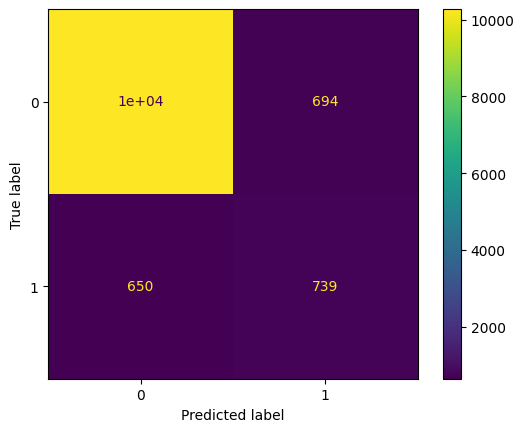

In [37]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test_JB, y_pred_dt)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_JB, y_pred_dt)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

cm = metrics.confusion_matrix(y_test_JB,y_pred_dt) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# **RF**

In [42]:
# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters
# Define the parameter grid
param = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [4, 6, 8],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores;
grid = GridSearchCV(estimator=RF,
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train_JB, y_train_JB)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-03-27 18:59:38.426074
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}
Best estimator: RandomForestClassifier(max_depth=6, n_estimators=300, random_state=10)
Feature importance: [6.07645613e-03 1.10415575e-01 1.31916855e-03 3.69391504e-02
 4.37740655e-03 2.35061576e-02 1.43037559e-02 2.45049841e-02
 5.31865838e-02 5.96747816e-02 4.30422723e-04 8.25889070e-05
 1.42085324e-04 1.23232572e-04 4.48449358e-04 1.48507016e-04
 1.55813742e-04 3.54818820e-04 2.43808621e-04 8.97964757e-05
 1.40838992e-04 2.57511287e-04 2.69470857e-04 4.73830914e-05
 1.94232828e-04 3.29109304e-04 2.22849586e-04 1.65940549e-05
 2.08281585e-04 4.37651687e-04 2.32471518e-04 1.19434398e-03
 0.00000000e+00 1.20106410e-04 2.32316703e-04 6.06969736e-05
 1.78969618e-04 4.82178085e-03 4.29056672e-04 1.93311893e-04
 3.91636183e-04 5.21910544e-04 3.07327842e-03 2.80326067e-03
 2.24646620e-0


Accuracy: 1.0


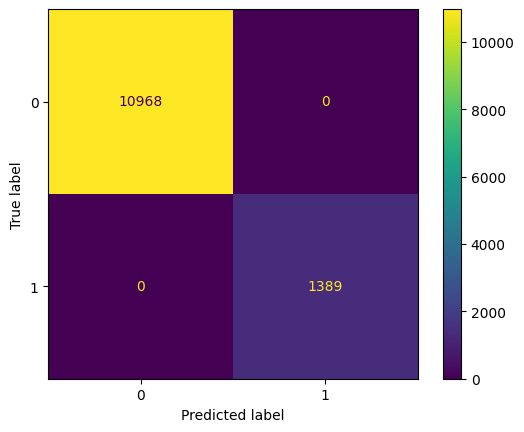

In [43]:
# confusion matrix

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test_JB)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test_JB, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test_JB,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()